Detected sentiments: ['neutral', 'neutral', 'happy', 'neutral', 'happy','happy','happy']
Overall sentiment: happy with 4 instances


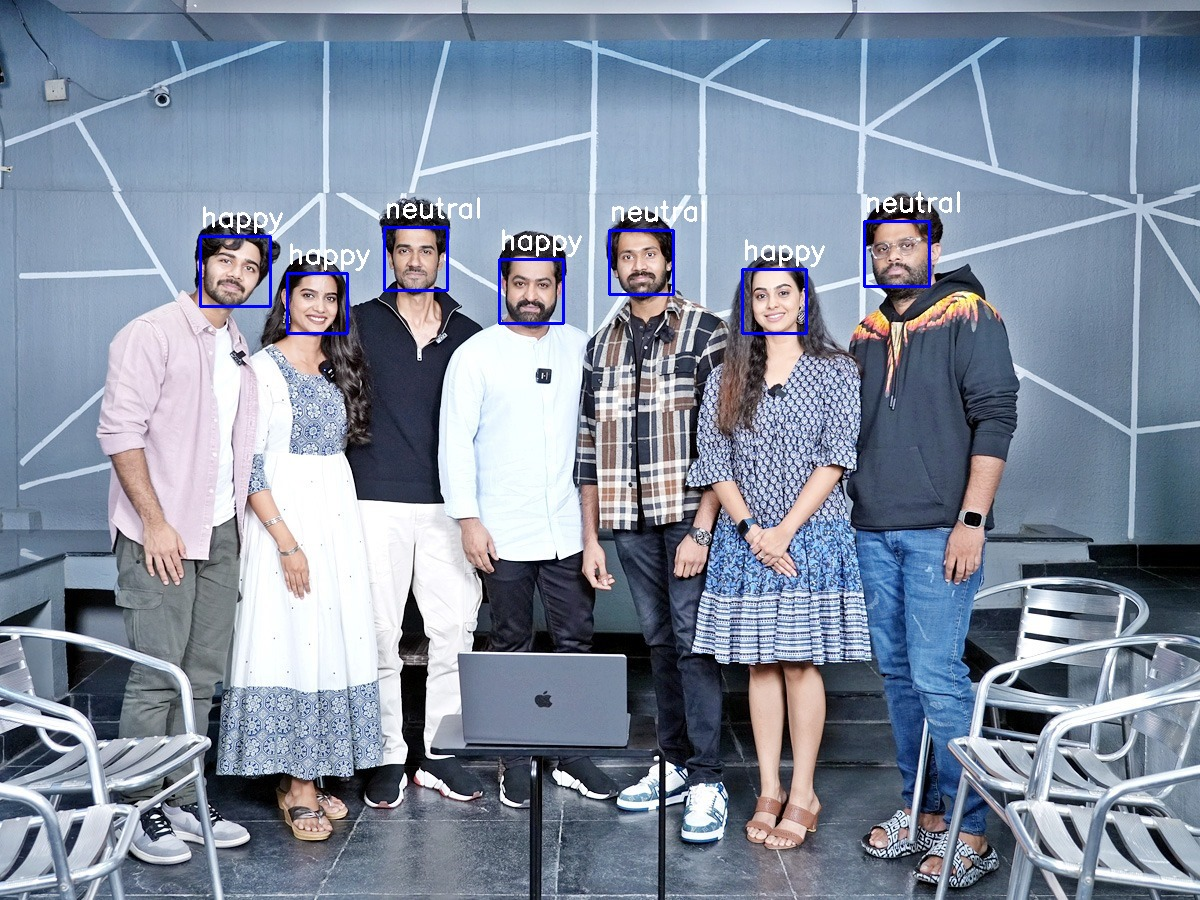

In [3]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from collections import Counter

# Initialize the Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect faces in an image
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return faces

# Function to classify basic emotions based on facial geometry
def classify_emotion(face_img):
    gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

    # Detect eyes in the face image
    eyes = eye_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=5)
    mouth_region = None

    # Assuming the mouth is below the eyes; get a rough bounding box for it
    if len(eyes) > 0:
        (ex, ey, ew, eh) = eyes[0]  # Take the first detected eye
        mouth_region = gray_face[ey + eh : ey + eh + 20, ex : ex + ew]  # Roughly extract the mouth region

    # Classify emotions based on simple rules
    if mouth_region is not None and np.mean(mouth_region) > 100:  # Arbitrary threshold for "smile"
        return "Happy"
    else:
        return "Sad"

# Function to process images in a directory
def process_images(image_directory):
    overall_sentiments = []

    # Loop through each image in the directory
    for filename in os.listdir(image_directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_directory, filename)
            img = cv2.imread(image_path)

            # Detect faces
            faces = detect_faces(img)

            # Analyze each detected face
            sentiments = []
            for (x, y, w, h) in faces:
                # Extract face region
                face_img = img[y:y+h, x:x+w]

                # Classify emotion for the face
                emotion = classify_emotion(face_img)
                sentiments.append(emotion)

                # Draw rectangle around the face and put the emotion label
                cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
                cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

            # Determine the overall sentiment for the image
            if sentiments:
                overall_sentiment = Counter(sentiments).most_common(1)[0][0]
                overall_sentiments.append(overall_sentiment)

                # Print detected emotions and overall sentiment
                print(f"Detected Sentiments in {filename}: {sentiments}")
                print(f"Overall Sentiment for {filename}: {overall_sentiment}")

            # Show the image with detected faces and emotions
            cv2_imshow(img)

    # Final analysis of overall sentiments
    if overall_sentiments:
        final_overall_sentiment = Counter(overall_sentiments).most_common(1)[0][0]
        print(f"Final Overall Sentiment across all images: {final_overall_sentiment}")

# Example usage
image_directory = '/content/crowd_images'
process_images(image_directory)
